# K Nearest Neighbors Project 

Welcome to the KNN Project! Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [32]:
df = pd.read_csv('KNN-Assignment.csv')

**Check the head of the dataframe.**

In [33]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742175   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

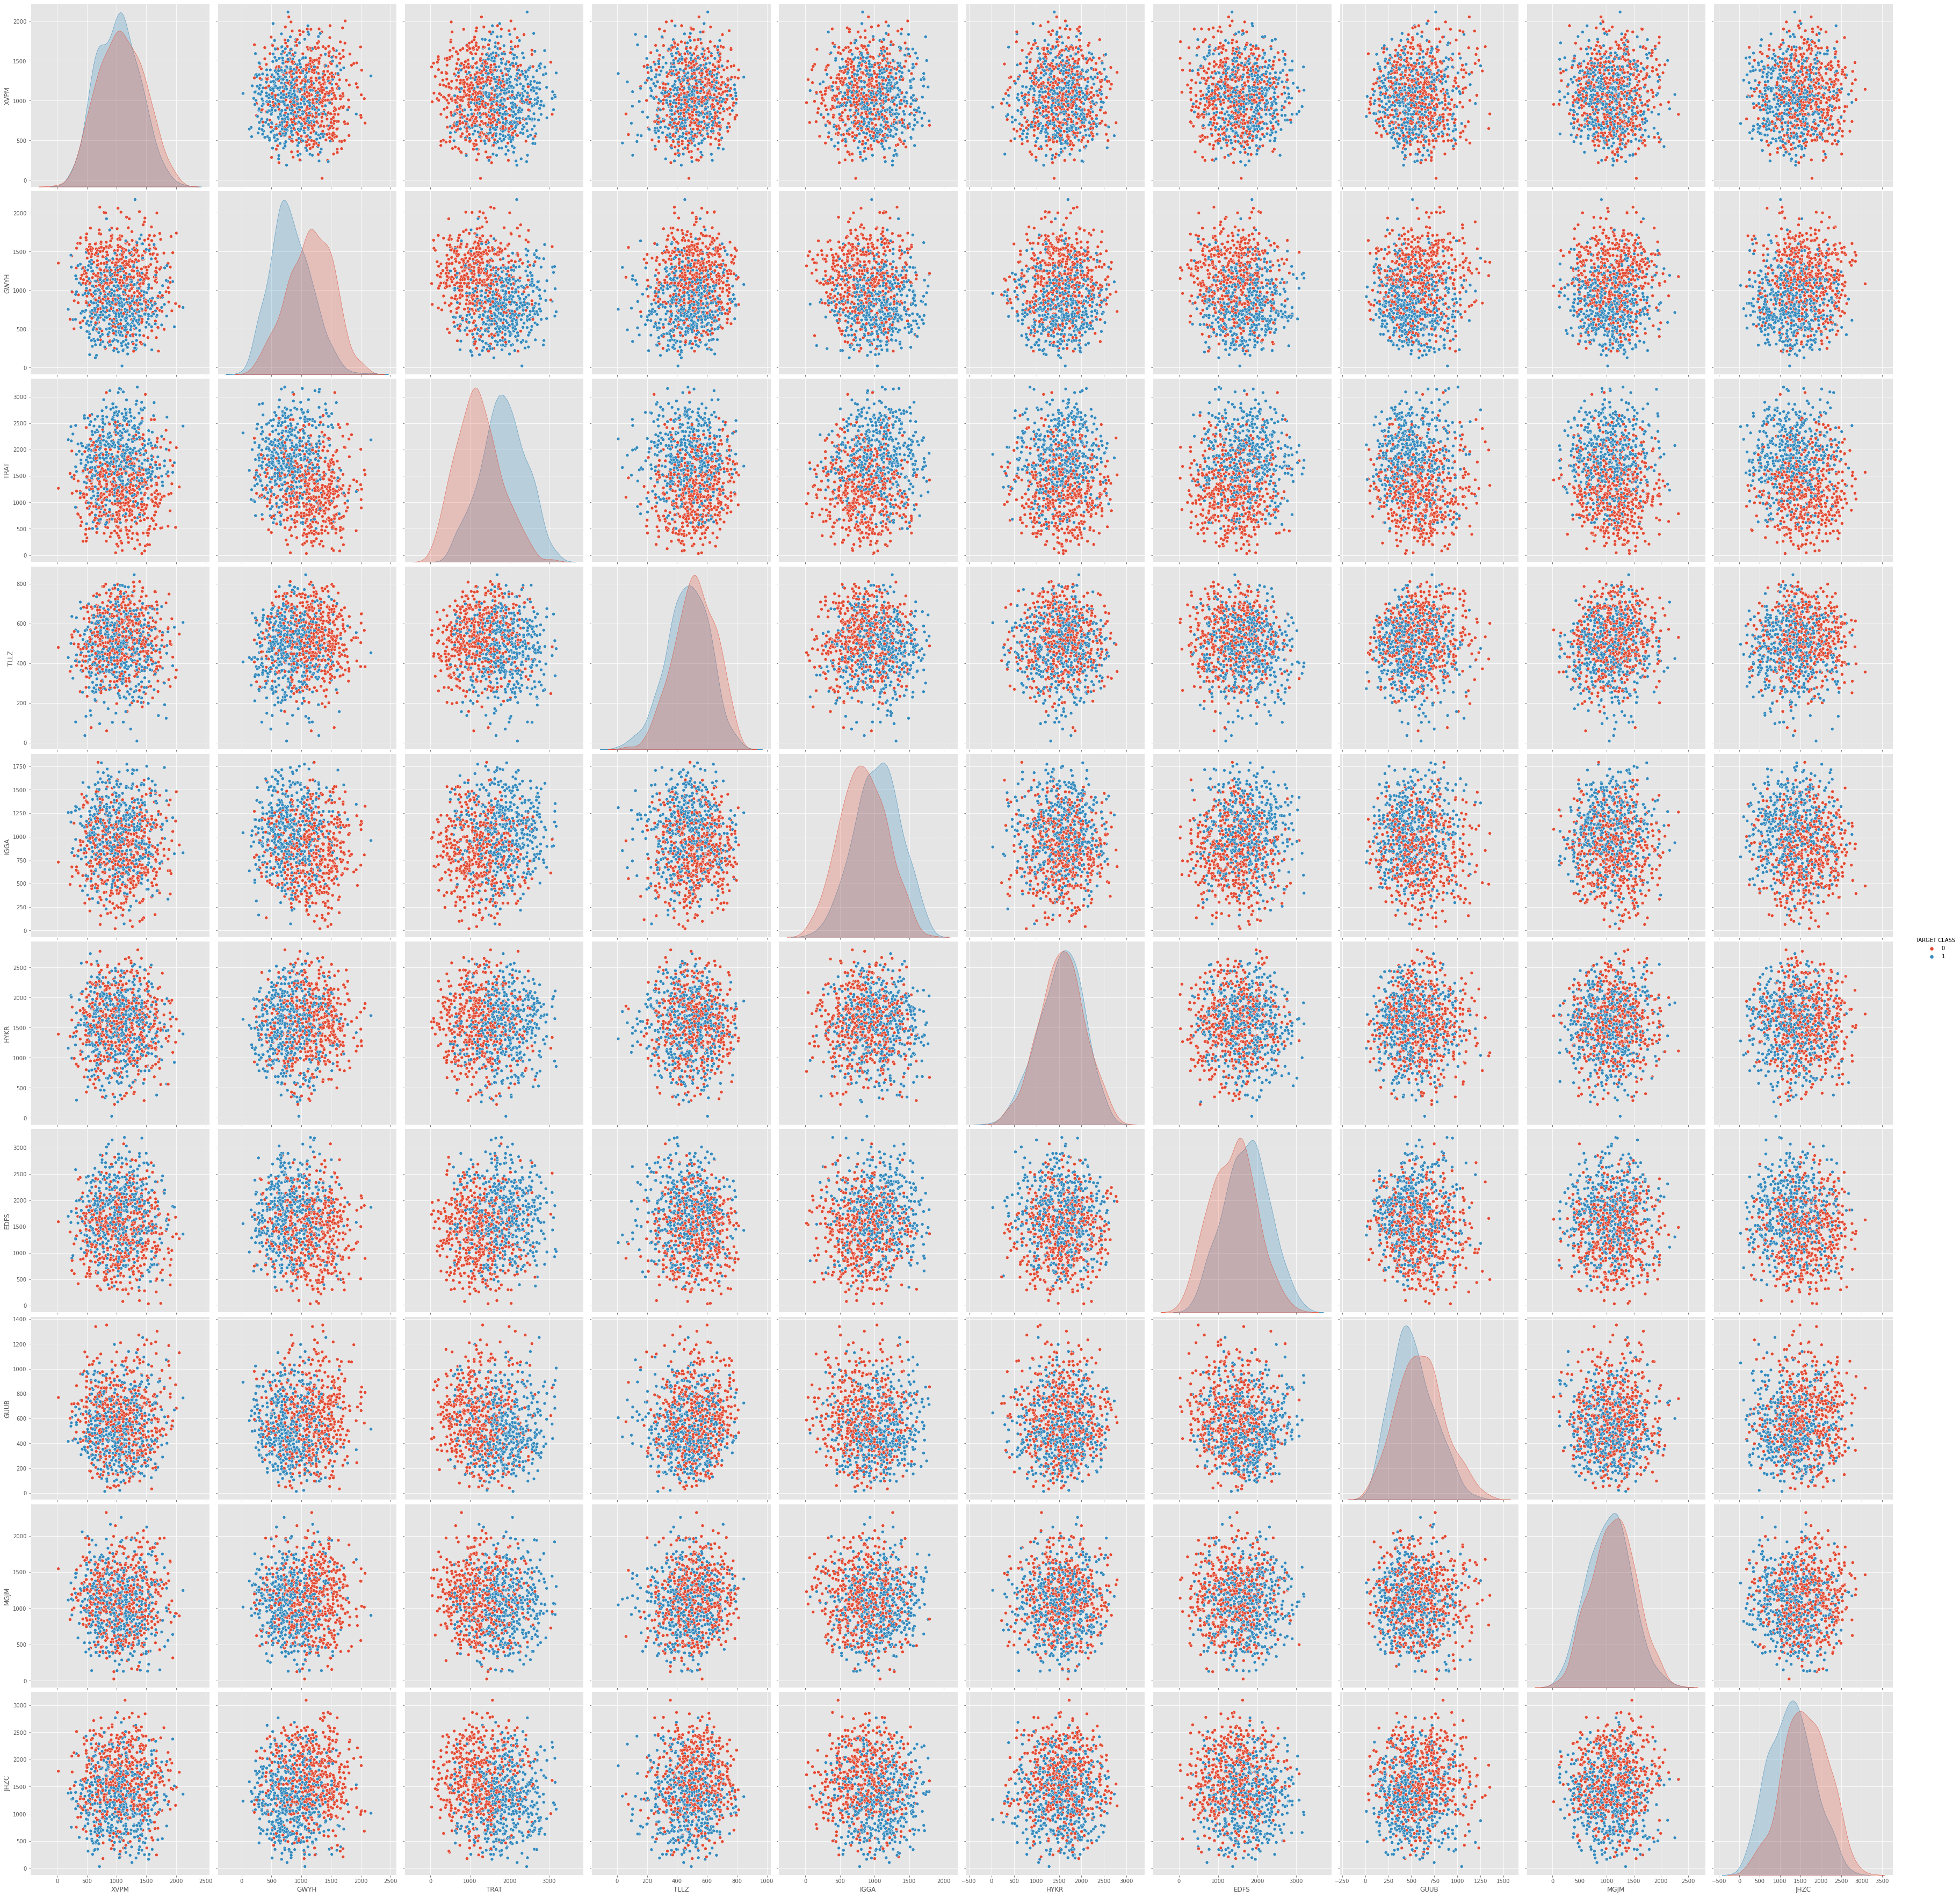

In [34]:
sns.pairplot(df,hue='TARGET CLASS',height=5)

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [35]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [36]:
X = df.drop(labels=['TARGET CLASS'],axis = 1)
Y = df['TARGET CLASS']

** Fit scaler to the features.**

In [37]:
scaler = StandardScaler().fit(X)

**Use the .transform() method to transform the features to a scaled version.**

In [38]:
X_transform = pd.DataFrame(scaler.transform(X),columns = ['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [39]:
X_transform.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4
                                                    ,random_state=40)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [57]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [60]:
Y_pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [61]:
print(confusion_matrix(y_test, Y_pred))

[[147  55]
 [ 51 147]]


In [62]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       202
           1       0.73      0.74      0.73       198

    accuracy                           0.73       400
   macro avg       0.74      0.74      0.73       400
weighted avg       0.74      0.73      0.73       400



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [63]:
neighbors = np.arange(1,40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
error_rate = []
y_pred = []
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train,y_train) 
    test_accuracy[i] = knn.score(X_test, y_test)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    print("Accuracy for k=",k,"is ",test_accuracy[i])

Accuracy for k= 1 is  0.735
Accuracy for k= 2 is  0.72
Accuracy for k= 3 is  0.755
Accuracy for k= 4 is  0.7475
Accuracy for k= 5 is  0.7825
Accuracy for k= 6 is  0.7675
Accuracy for k= 7 is  0.7925
Accuracy for k= 8 is  0.785
Accuracy for k= 9 is  0.795
Accuracy for k= 10 is  0.7775
Accuracy for k= 11 is  0.7925
Accuracy for k= 12 is  0.7825
Accuracy for k= 13 is  0.8
Accuracy for k= 14 is  0.785
Accuracy for k= 15 is  0.7875
Accuracy for k= 16 is  0.785
Accuracy for k= 17 is  0.795
Accuracy for k= 18 is  0.7825
Accuracy for k= 19 is  0.795
Accuracy for k= 20 is  0.7875
Accuracy for k= 21 is  0.7825
Accuracy for k= 22 is  0.7825
Accuracy for k= 23 is  0.785
Accuracy for k= 24 is  0.795
Accuracy for k= 25 is  0.785
Accuracy for k= 26 is  0.7875
Accuracy for k= 27 is  0.7875
Accuracy for k= 28 is  0.785
Accuracy for k= 29 is  0.79
Accuracy for k= 30 is  0.795
Accuracy for k= 31 is  0.795
Accuracy for k= 32 is  0.795
Accuracy for k= 33 is  0.7875
Accuracy for k= 34 is  0.7875
Accuracy fo

**Plot between Train accuracy and Test accuracy.**

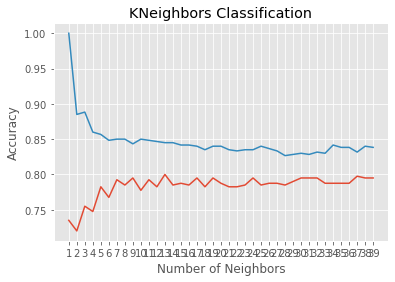

In [64]:
plt.title("KNeighbors Classification")
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.xticks(range(1,40))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'Error Rate vs K-value')

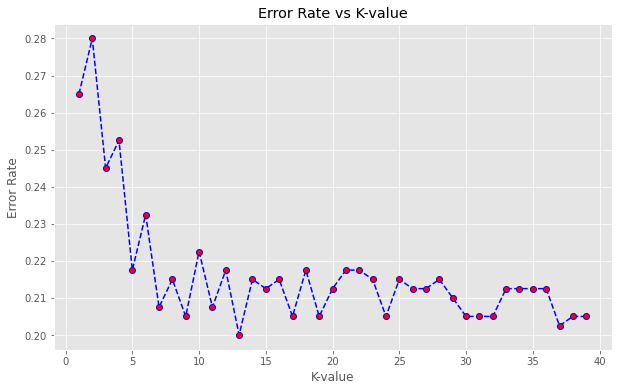

In [65]:
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40), error_rate, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [69]:
#Retraining the model with K = 37
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

[[155  47]
 [ 34 164]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       202
           1       0.78      0.83      0.80       198

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

